# Mnist Project

## 1. Import Libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


## 2. Loading data


In [2]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data() 



In [3]:
type(X_train)

numpy.ndarray

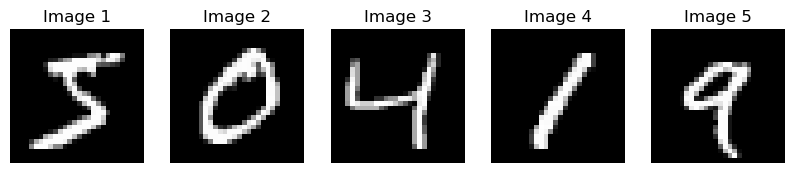

In [5]:
first_10_images = X_train[:5]

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(first_10_images[i].squeeze(), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.show()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## 3. Reshaping input data for CNN training


In [5]:
#(num_samples, width, height, num_channels=1 for grayscale images or 3 for RGB images)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 4. Normalizing the pixel values


In [7]:
X_train=X_train/255
X_test=X_test/255

## 5. Creat Model

In [8]:

#creat model
model=Sequential()

#adding CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # 32= number of filters or feature maps
                                                                    # (3,3) size of the convolutional filters.
                                                                    # Rectified Linear Unit, introduce non-linearity
#adding pooling layer
model.add(MaxPool2D(2,2))

#adding fully connected layer
model.add(Flatten())  #reshape the output into a 1D vector
model.add(Dense(100,activation='relu'))  #dense layer will have 100 neurons   

#adding output layer
model.add(Dense(10,activation='softmax')) #The activation function used in the output layer is 'softmax' (converts the raw model outputs into a probability distribution )

#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model
model.fit(X_train,y_train,epochs=10)




Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1579 - accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0536 - accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

## 6. Evaluate The Model

In [10]:
#evaluting the model
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9887


[0.04611295834183693, 0.9886999726295471]

In [11]:
# Get the predicted probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Convert the probabilities to class labels (predicted labels)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Now 'y_pred' contains the predicted labels for the test data
print(y_pred)

313/313 [==============================] - 2s 7ms/step
[7 2 1 ... 4 5 6]


## 7. Confusion Matrix

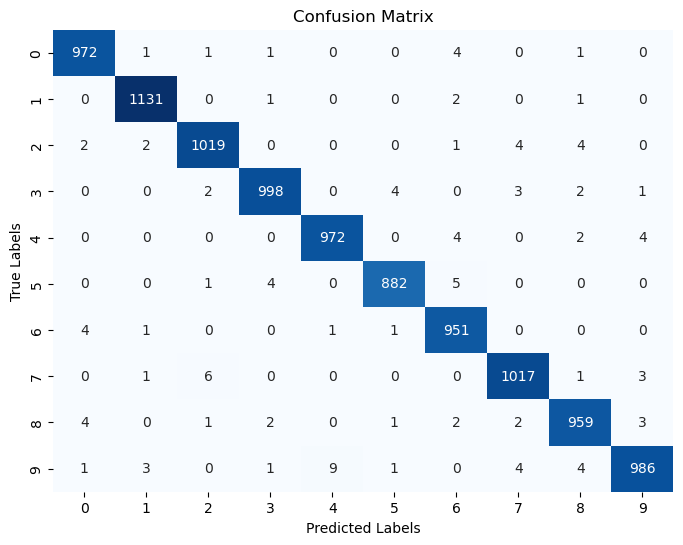

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
